# Perceptron and Keras

## Configuration

In [1]:
# load lib
import numpy as np
import pandas as pd
import os

# random seed
np.random.seed(42)

# for figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "./"
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("save fig :", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Perceptron

In [2]:
# load data and lib
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
x = iris.data[:, (2,3)] # extract two features
y = (iris.target == 0).astype(np.int32) # extract label

# fit the perceptron
percept = Perceptron( max_iter=1000, tol=1e-3, random_state=42)
percept.fit(x, y)

# predic a sample
y_pred = percept.predict([[2, 0.5]])
print("y_pred is ", y_pred)

y_pred is  [1]


save fig : perceptron_iris_plot


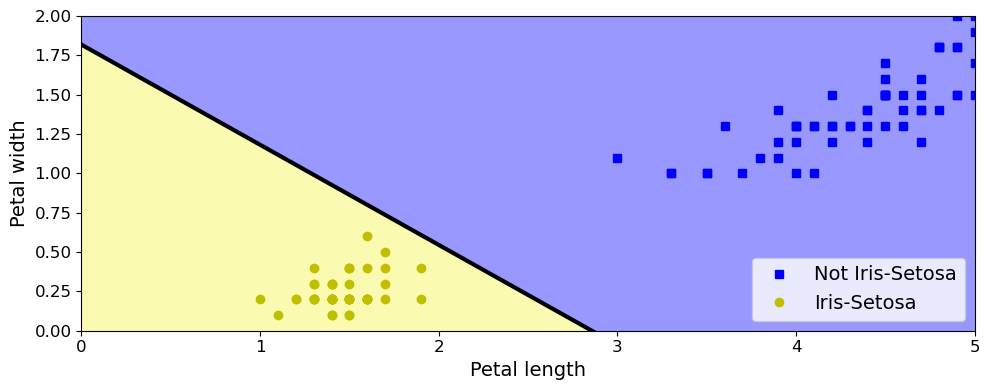

In [3]:
# plot the data and the perceptron line
a = -percept.coef_[0][0] / percept.coef_[0][1]
b = -percept.intercept_ / percept.coef_[0][1]
axes = [0,5,0,2]

x0, x1 = np.meshgrid(
    np.linspace( axes[0], axes[1], 500).reshape(-1,1),
    np.linspace( axes[2], axes[3], 500).reshape(-1,1),
)
x_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = percept.predict(x_new)
zz = y_pred.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(x[y==0, 0], x[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(x[y==1, 0], x[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

## Activation function

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

save fig : activation_functions_plot


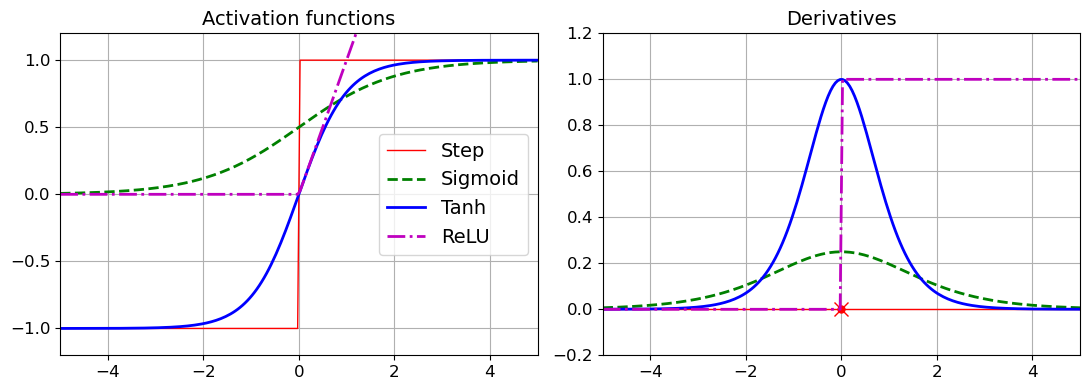

In [5]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

## Keras - Image classification

In [6]:
# load tf and keras
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.18.0
3.7.0


In [7]:
# load data - MNIST
fashion = keras.datasets.fashion_mnist
(x_train_f, y_train_f), (x_test, y_test) = fashion.load_data()
print(x_train_f.shape)
print(y_train_f.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
# data processing
x_valid, x_train = x_train_f[:5000] / 255., x_train_f[5000:] / 255.
y_valid, y_train = y_train_f[:5000], y_train_f[5000:]
x_test = x_test / 255.0

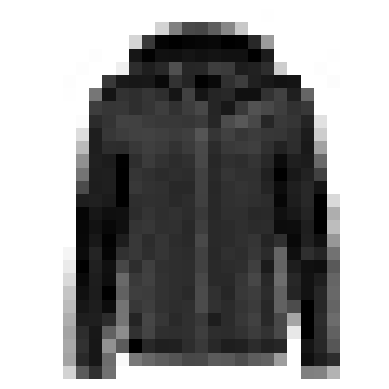

save fig : fashion_mnist_plot


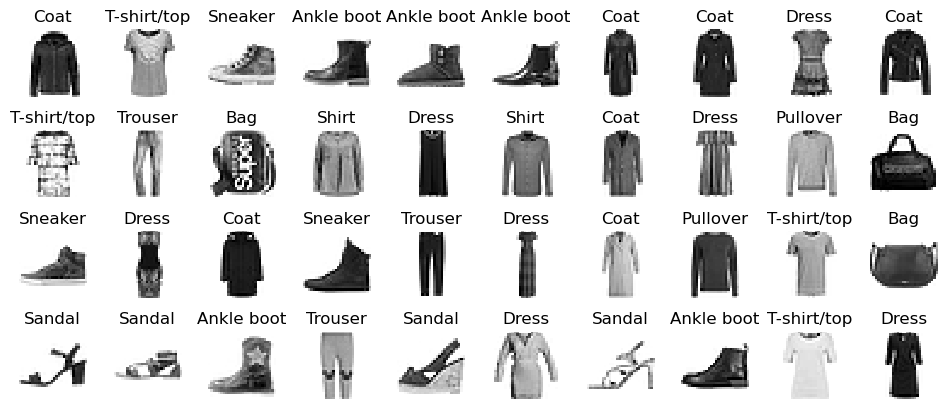

In [9]:
# plot a sample images
plt.imshow( x_train[0],  cmap="binary")
plt.axis("off")
plt.show()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [10]:
# random seed
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
# build the model in keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

C:\Users\gopwi\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
keras.utils.plot_model(model, "./images/my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [15]:
# inside of the model
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [16]:
model.get_layer(hidden1.name) is hidden1

True

In [17]:
w, b = hidden1.get_weights()
print(w, b)

[[-0.00757319  0.02248133 -0.04095495 ...  0.00905848  0.01996369
  -0.07426454]
 [ 0.0124869   0.05345632  0.03697745 ... -0.00119745 -0.03342154
   0.01212391]
 [-0.04601151 -0.06062117 -0.01098821 ...  0.04673382  0.0105373
   0.05382437]
 ...
 [ 0.02119116 -0.02536825  0.04665428 ...  0.03058314 -0.05911262
  -0.04001073]
 [ 0.04730159 -0.03449617  0.03012774 ...  0.04742195  0.03116307
  -0.04399758]
 [-0.00684278  0.02617662  0.02323616 ...  0.06421618  0.02937915
  -0.03188574]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [18]:
# compile the model
model.compile( loss="sparse_categorical_crossentropy",
               optimizer="sgd",
               metrics=["accuracy"] )
# equivalant
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

# run learning
history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 923us/step - loss: 0.9760 - sparse_categorical_accuracy: 0.6903 - val_loss: 0.5171 - val_sparse_categorical_accuracy: 0.8256
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 919us/step - loss: 0.4945 - sparse_categorical_accuracy: 0.8260 - val_loss: 0.4532 - val_sparse_categorical_accuracy: 0.8458
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 917us/step - loss: 0.4429 - sparse_categorical_accuracy: 0.8431 - val_loss: 0.4219 - val_sparse_categorical_accuracy: 0.8548
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 905us/step - loss: 0.4137 - sparse_categorical_accuracy: 0.8540 - val_loss: 0.4026 - val_sparse_categorical_accuracy: 0.8608
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 924us/step - loss: 0.3931 - sparse_categorical_accuracy: 0.8609 - val_loss: 0.3879 - val_sparse_categorical_accuracy: 0.8652
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 902us/step - loss: 0.3768 - sparse_categorical_accuracy: 0.8668 - val_loss: 0.3746 - val_sparse_categoric

In [19]:
print(history.params)
print(history.epoch)
print(history.history.keys())
print(history.history)

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])
{'loss': [0.7060360908508301, 0.4813104271888733, 0.4377003312110901, 0.41078999638557434, 0.391254186630249, 0.375552773475647, 0.36220234632492065, 0.3505289852619171, 0.34024474024772644, 0.3308674991130829, 0.3222089409828186, 0.314175009727478, 0.30663347244262695, 0.29969123005867004, 0.2931404113769531, 0.28683027625083923, 0.28096526861190796, 0.27519774436950684, 0.26971355080604553, 0.26463884115219116, 0.259586900472641, 0.2548926770687103, 0.25027331709861755, 0.24576663970947266, 0.2414511740207672, 0.23712661862373352, 0.23296764492988586, 0.22891059517860413, 0.2249542474746704, 0.22098298370838165], 'sparse_categorical_accuracy': [0.7691090703010559, 0.831636369228363, 0.8459636569023132, 0.8553818464279175, 0.861472

save fig : keras_learning_curves_plot


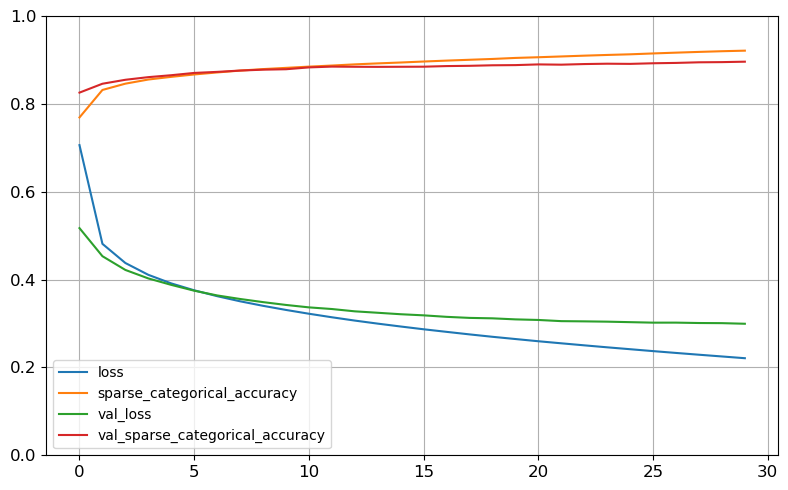

In [20]:
# plot acc and loss
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.3382 - sparse_categorical_accuracy: 0.8810
[0.33476459980010986, 0.8812999725341797]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.   0.   0.   0.   0.   0.01 0.   0.01 0.   0.98]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[9 2 1]
save fig : fashion_mnist_images_plot


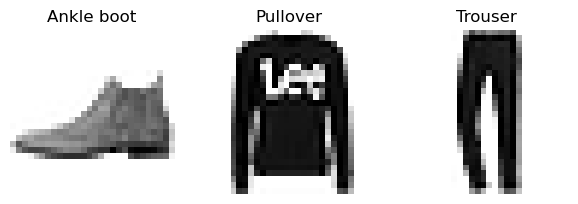

In [21]:
# evaluation and prediction for test samples
print(model.evaluate(x_test, y_test))
print(model.predict(x_test[:3]).round(2))
print(np.argmax( model.predict( x_test[:3]) , axis=-1 ) )

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(x_test[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

## Keras - MLP Regression|

In [22]:
# load lib and data
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [23]:
# set random seeds
np.random.seed(42)
tf.random.set_seed(42)

In [24]:
# set model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# run learning
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

# test setup
mes_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/30
185/363 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 3.7397

C:\Users\gopwi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 3.1655 - val_loss: 3.5137
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 0.8940 - val_loss: 0.7901
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 0.7561 - val_loss: 0.6871
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 0.7089 - val_loss: 0.6376
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 0.6765 - val_loss: 0.6048
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 0.6502 - val_loss: 0.5790
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 0.6274 - val_loss: 0.5566
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 0.6072 - val_loss: 0.5370
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 0.5887 - val_loss: 0.5202
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 0.5719 - val_loss: 0.5051
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: 0.5566 - val_loss: 0.4915
Epoch 12/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 

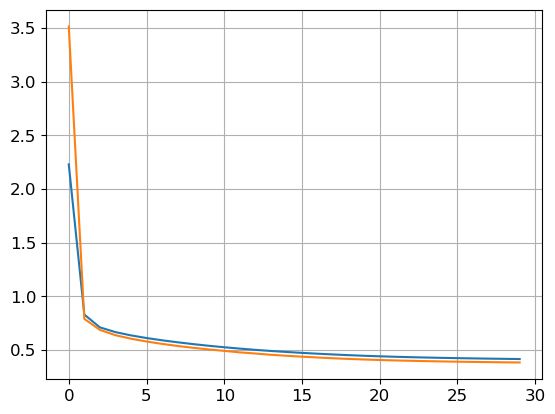

{'verbose': 'auto', 'epochs': 30, 'steps': 363}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
dict_keys(['loss', 'val_loss'])
{'loss': [2.2290661334991455, 0.8298980593681335, 0.7105977535247803, 0.66646808385849, 0.6359366178512573, 0.6113606691360474, 0.5902318358421326, 0.5715205669403076, 0.5545618534088135, 0.5392234921455383, 0.5253337025642395, 0.5126698017120361, 0.5011265873908997, 0.49069446325302124, 0.4813636243343353, 0.4729669690132141, 0.46522951126098633, 0.45816341042518616, 0.4517136514186859, 0.4459954500198364, 0.4410303831100464, 0.43669360876083374, 0.43285101652145386, 0.42949411273002625, 0.4265137016773224, 0.42384999990463257, 0.42146730422973633, 0.4193144738674164, 0.41734108328819275, 0.41553422808647156], 'val_loss': [3.5136983394622803, 0.7900828719139099, 0.6870847344398499, 0.6376199722290039, 0.6048465967178345, 0.5790358185768127, 0.5566224455833435, 0.5370153188705444, 0.520247757434845

In [25]:
# plot loss
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.show()
print(history.params)
print(history.epoch)
print(history.history.keys())
print(history.history)

In [26]:
# prediction
y_pred

array([[0.4447357],
       [1.702836 ],
       [3.3524818]], dtype=float32)

## Save and Load

In [27]:
# set model and fit
model1 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model1.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model1.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model1.evaluate(X_test, y_test)
print(history.params)
print(history.epoch)
print(history.history.keys())
print(history.history)
model1.predict(X_new)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 2.3330 - val_loss: 1.8319
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - loss: 0.7492 - val_loss: 0.6590
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 0.6656 - val_loss: 0.5671
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 0.6143 - val_loss: 0.5378
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 0.5756 - val_loss: 0.5176
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.5456 - val_loss: 0.5033
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 0.5217 - val_loss: 0.4908
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 0.5025 - val_loss: 0.4822
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 0.4872 - val_loss: 0.4746
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 0.4750 - val_loss: 0.4687
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.4464
{'verbose': 'auto', 'epochs': 10, 'steps': 363}
[0, 1, 2, 3, 

array([[0.69671965],
       [1.608598  ],
       [3.3556674 ]], dtype=float32)

In [28]:
# save model
model1.save("./data/my_keras_model.keras")

In [29]:
# load model
model2 = keras.models.load_model("./data/my_keras_model.keras")
model2.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0.69671965],
       [1.608598  ],
       [3.3556674 ]], dtype=float32)

In [30]:
# save weight
model1.save_weights("./data/my_keras_weights.weights.h5")

In [31]:
# load weight
model2.load_weights("./data/my_keras_weights.weights.h5")

In [32]:
# check the weights
model1.weights[0] == model2.weights[0]

<tf.Tensor: shape=(8, 30), dtype=bool, numpy=
array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         Tru

## Callback / Rollback in the learning

In [33]:
# load lib
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [34]:
# set model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [35]:
# set callback at the best loss and rollback
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("./data/my_keras_model.keras", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("./data/my_keras_model.keras") # rollback to the best loss
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 3.0585 - val_loss: 3.9222
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.8408 - val_loss: 0.6949
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 0.7067 - val_loss: 0.6074
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 0.6598 - val_loss: 0.5656
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 0.6251 - val_loss: 0.5352
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 0.5951 - val_loss: 0.5121
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - loss: 0.5687 - val_loss: 0.4926
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 0.5452 - val_loss: 0.4746
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 0.5247 - val_loss: 0.4610
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 0.5070 - val_loss: 0.4500
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.4731


In [36]:
# stop after 10 steps after the best loss
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 0.4918 - val_loss: 0.4415
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 0.4786 - val_loss: 0.4347
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 0.4673 - val_loss: 0.4293
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 0.4576 - val_loss: 0.4241
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 0.4492 - val_loss: 0.4198
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 0.4420 - val_loss: 0.4166
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 0.4355 - val_loss: 0.4136
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.4298 - val_loss: 0.4102
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 0.4247 - val_loss: 0.4078
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 0.4202 - val_loss: 0.4046
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 0.4162 - val_loss: 0.4029
Epoch 12/100
363/36

In [37]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

297/363 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 0.3698
val/train: 1.03
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 0.3670 - val_loss: 0.3654


## hyper-paramter tuning - from TensorFlow document

In [38]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

In [39]:
# load data
(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()

# def model
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

# def tuner
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='./data/',
                     project_name='intro_to_kt')

# def early stop
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# search the best hyper paramter
tuner.search(img_train, label_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Reloading Tuner from ./data/intro_to_kt\tuner0.json

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 352 and the optimal learning rate for the optimizer
is 0.0001.



In [40]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(img_train, label_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50


C:\Users\gopwi\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6834 - loss: 19.7211 - val_accuracy: 0.7951 - val_loss: 6.6010
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8061 - loss: 5.4031 - val_accuracy: 0.8259 - val_loss: 4.3264
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8258 - loss: 3.6661 - val_accuracy: 0.8248 - val_loss: 3.5212
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8388 - loss: 2.8328 - val_accuracy: 0.8313 - val_loss: 3.0214
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8475 - loss: 2.3118 - val_accuracy: 0.8372 - val_loss: 2.6692
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8555 - loss: 1.9085 - val_accuracy: 0.8317 - val_loss: 2.6414
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8630 - loss: 1.6031 - val_accuracy: 0.8338 - val_loss: 2.3355
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8683 - loss: 1.3997 - val_accura

In [41]:
# Retrain the model with the best epoch
hypermodel = tuner.hypermodel.build(best_hps)
hypermodel.fit(img_train, label_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/32
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6859 - loss: 17.1983 - val_accuracy: 0.8039 - val_loss: 5.4701
Epoch 2/32
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8080 - loss: 4.8559 - val_accuracy: 0.7918 - val_loss: 4.7314
Epoch 3/32
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8253 - loss: 3.3360 - val_accuracy: 0.8227 - val_loss: 3.2871
Epoch 4/32
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8358 - loss: 2.6334 - val_accuracy: 0.8329 - val_loss: 2.7786
Epoch 5/32
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8486 - loss: 2.0813 - val_accuracy: 0.8466 - val_loss: 2.3289
Epoch 6/32
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8546 - loss: 1.7278 - val_accuracy: 0.8325 - val_loss: 2.4360
Epoch 7/32
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8641 - loss: 1.5007 - val_accuracy: 0.8292 - val_loss: 2.4340
Epoch 8/32
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8716 - loss: 1.3040 -

In [42]:
# evaluate the hypermodel with the test data
eval_result = hypermodel.evaluate(img_test, label_test)
print("[test loss, test accuracy]:", eval_result)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.8611 - loss: 1.1667
[test loss, test accuracy]: [1.0936187505722046, 0.8659999966621399]
